<a href="https://colab.research.google.com/github/Ashwinikh297/R.Discriptive-Statistics/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries 

In [1]:
# Uncomment the below line and Install 'mlxtend' Library if not installed already
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder


In [4]:
titanic = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/Titanic(ap).csv")
titanic

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No
...,...,...,...,...
2196,Crew,Female,Adult,Yes
2197,Crew,Female,Adult,Yes
2198,Crew,Female,Adult,Yes
2199,Crew,Female,Adult,Yes


# Pre-Processing
As the data is not in transaction formation 
We are using transaction Encoder

In [5]:
df=pd.get_dummies(titanic)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


# Apriori Algorithm 

In [6]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [8]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules
# rules.sort_values('lift',ascending = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Age_Adult),(Class_1st),0.950477,0.147660,0.144934,0.152486,1.032680,0.004587,1.005694
1,(Class_1st),(Age_Adult),0.147660,0.950477,0.144934,0.981538,1.032680,0.004587,2.682493
2,(Class_3rd),(Survived_No),0.320763,0.676965,0.239891,0.747875,1.104747,0.022745,1.281251
3,(Survived_No),(Class_3rd),0.676965,0.320763,0.239891,0.354362,1.104747,0.022745,1.052040
4,(Gender_Male),(Class_Crew),0.786461,0.402090,0.391640,0.497978,1.238474,0.075412,1.191004
...,...,...,...,...,...,...,...,...,...
69,"(Gender_Male, Survived_No)","(Age_Adult, Class_Crew)",0.619718,0.402090,0.304407,0.491202,1.221623,0.055225,1.175143
70,(Age_Adult),"(Survived_No, Gender_Male, Class_Crew)",0.950477,0.304407,0.304407,0.320268,1.052103,0.015075,1.023334
71,(Class_Crew),"(Age_Adult, Gender_Male, Survived_No)",0.402090,0.603816,0.304407,0.757062,1.253795,0.061619,1.630802
72,(Gender_Male),"(Age_Adult, Survived_No, Class_Crew)",0.786461,0.305770,0.304407,0.387060,1.265851,0.063931,1.132622


In [9]:
rules.sort_values('lift',ascending = True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Gender_Male),(Age_Adult),0.786461,0.950477,0.757383,0.963027,1.013204,0.009870,1.339441
12,(Age_Adult),(Gender_Male),0.950477,0.786461,0.757383,0.796845,1.013204,0.009870,1.051116
17,(Survived_No),(Age_Adult),0.676965,0.950477,0.653339,0.965101,1.015386,0.009900,1.419023
16,(Age_Adult),(Survived_No),0.950477,0.676965,0.653339,0.687380,1.015386,0.009900,1.033317
20,(Gender_Male),"(Class_3rd, Survived_No)",0.786461,0.239891,0.191731,0.243790,1.016252,0.003066,1.005156
19,"(Class_3rd, Survived_No)",(Gender_Male),0.239891,0.786461,0.191731,0.799242,1.016252,0.003066,1.063667
51,(Age_Adult),"(Gender_Male, Survived_No)",0.950477,0.619718,0.603816,0.635277,1.025106,0.014788,1.042660
50,"(Gender_Male, Survived_No)",(Age_Adult),0.619718,0.950477,0.603816,0.974340,1.025106,0.014788,1.929980
24,(Class_3rd),"(Age_Adult, Survived_No)",0.320763,0.653339,0.216265,0.674221,1.031961,0.006698,1.064097
23,"(Age_Adult, Survived_No)",(Class_3rd),0.653339,0.320763,0.216265,0.331015,1.031961,0.006698,1.015325


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc410f41510>,
      dtype=object)

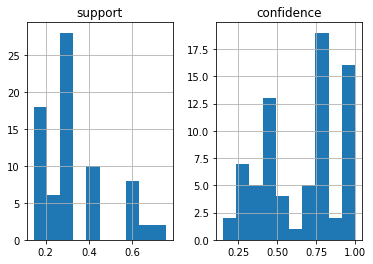

In [11]:
rules[['support','confidence']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4109b7b50>,
      dtype=object)

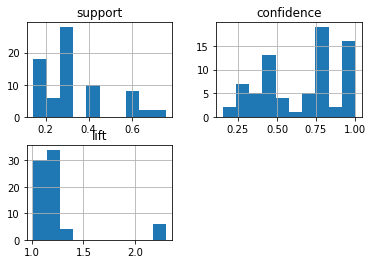

In [12]:
rules[['support','confidence','lift']].hist()

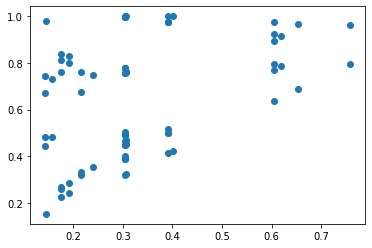

In [17]:
import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(rules['support'], rules['confidence'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


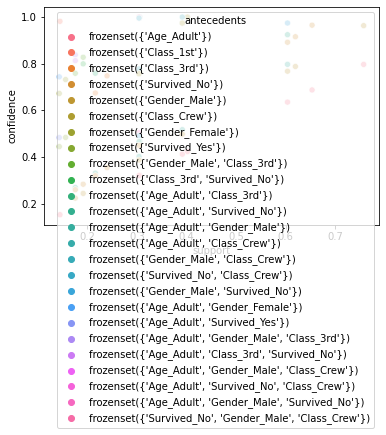

In [20]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules, hue='antecedents')

plt.show()

In [21]:
!pip install nsepython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from nsepython import *   
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [ ]:
oi_data, ltp, crontime = oi_chain_builder("RELIANCE","latest","full")
print(oi_data)
print(ltp)
print(crontime)
